A Project That Detects Spam Messages

We Chose To Use Machine Learning To Categorize Text Messages As Spam Or Not Spam(Ham). 


In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

accessing the the data(spam.csv containing spam and non spam messages)

In [2]:
data = pd.read_csv("./input/spam.csv", encoding = 'latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Lets Start By Visulising Our Input Data!

The distribution of spam and non-spam messages is visualized using a pie chart. From the chart, we can see that the dataset is imbalanced, with approximately 86.6% non-spam messages and 13.4% spam messages.

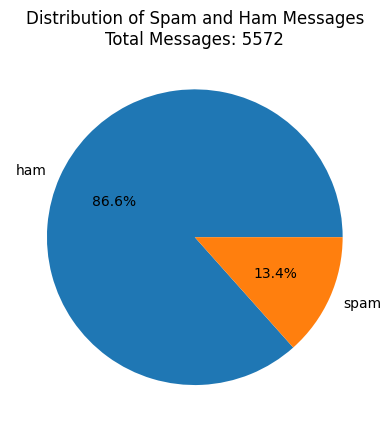

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into a DataFrame called 'data'

# Drop unavailable attributes
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns
data = data.rename(columns={"v1": "target", "v2": "text"})

# Count the number of ham and spam messages
value_counts = data['target'].value_counts()

# Plot pie chart of spam and ham distribution
labels = value_counts.index
sizes = value_counts.values
total_messages = len(data)  # Calculate the total number of messages

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f'Distribution of Spam and Ham Messages\nTotal Messages: {total_messages}')
plt.show()


Lets Start With A Naive Approach,Lets Train A Naive Bayes Model.

Accuracy: 0.9695067264573991
Precision: 0.9692084954873896
Recall: 0.9695067264573991
F1 Score: 0.9693322247173323
Confusion Matrix:
[[950  15]
 [ 19 131]]


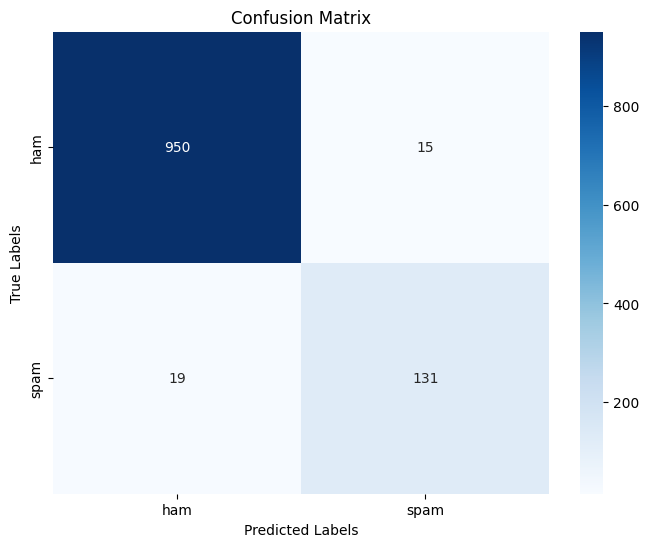


Instances where predictions don't match true labels:
Text: Hey mate. Spoke to the mag people. WeÛ÷re on.  the is deliver by the end of the month. Deliver on the 24th sept. Talk later. 
True Label: ham
Predicted Label: spam

Text: I liked the new mobile
True Label: ham
Predicted Label: spam

Text: tddnewsletter@emc1.co.uk (More games from TheDailyDraw) Dear Helen, Dozens of Free Games - with great prizesWith..
True Label: spam
Predicted Label: ham

Text: ringtoneking 84484
True Label: spam
Predicted Label: ham

Text: You have an important customer service announcement from PREMIER.
True Label: spam
Predicted Label: ham

Text: RT-KIng Pro Video Club>> Need help? info@ringtoneking.co.uk or call 08701237397 You must be 16+ Club credits redeemable at www.ringtoneking.co.uk! Enjoy!
True Label: spam
Predicted Label: ham

Text: I'm vivek:)i got call from your number.
True Label: ham
Predicted Label: spam

Text: How u doin baby girl ?? hope u are okay every time I call ure phone is off! I mis

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Create a graphical representation of the confusion matrix
class_names = list(decision_tree.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print all instances from the test set where the prediction doesn't match the true label
false_Ham = []
false_Spam = []

print("\nInstances where predictions don't match true labels:")
for idx in range(len(X_test)):
    if y_test.iloc[idx] != y_pred[idx]:
        print("Text:", X_test.iloc[idx])
        print("True Label:", y_test.iloc[idx])
        print("Predicted Label:", y_pred[idx])
        print()
        if y_pred[idx] == "ham":
            false_Ham.append(X_test.iloc[idx])
        elif y_pred[idx] == "spam":
            false_Spam.append(X_test.iloc[idx])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Most used words in false_Ham:
      Word  Frequency
219    to         15
243   you         14
57   call          8
95   from          6
161   now          6

Most used words in false_Spam:
      Word  Frequency
163   the         17
191  will         13
18     be         13
196   you         12
72    her         10


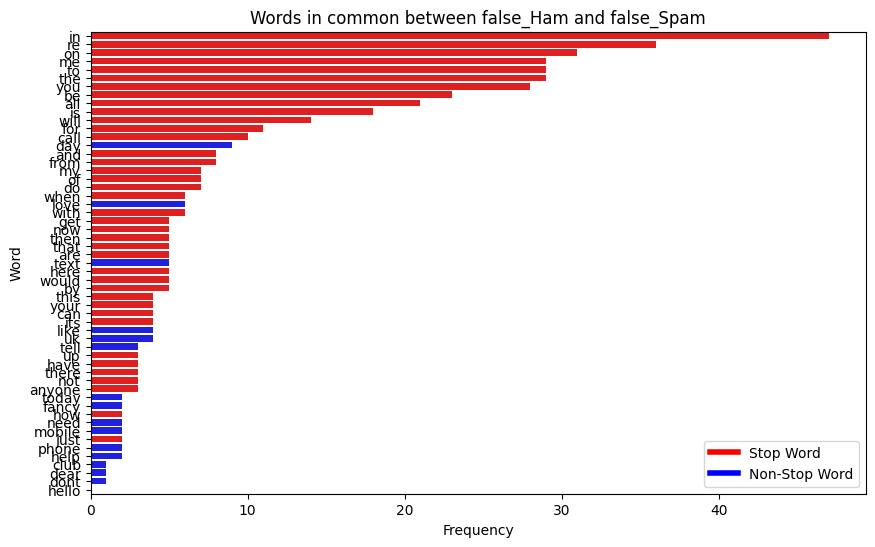

In [5]:
import random
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Download the list of English stop words if not already downloaded
nltk.download('stopwords')

# Get the English stop words from both NLTK and sklearn
nltk_stop_words = set(stopwords.words('english'))
sklearn_stop_words = set(ENGLISH_STOP_WORDS)

# Combine both sets of stop words
english_stop_words = nltk_stop_words.union(sklearn_stop_words)

# Count word frequencies in each array
false_ham_texts = " ".join(false_Ham)
false_spam_texts = " ".join(false_Spam)

false_ham_vectorizer = CountVectorizer()
false_ham_vectorized = false_ham_vectorizer.fit_transform([false_ham_texts])
false_ham_word_counts = np.array(false_ham_vectorized.sum(axis=0)).flatten()

false_spam_vectorizer = CountVectorizer()
false_spam_vectorized = false_spam_vectorizer.fit_transform([false_spam_texts])
false_spam_word_counts = np.array(false_spam_vectorized.sum(axis=0)).flatten()

# Get the most used words in each array
def get_most_used_words(vectorizer, word_counts, category):
    words = np.array(vectorizer.get_feature_names_out())
    word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_counts})
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(5)  # Show the top 5 most used words
    print(f"\nMost used words in {category}:\n", word_freq_df)

get_most_used_words(false_ham_vectorizer, false_ham_word_counts, "false_Ham")
get_most_used_words(false_spam_vectorizer, false_spam_word_counts, "false_Spam")

# Find common words between the two arrays
common_words = set(false_ham_vectorizer.get_feature_names_out()).intersection(false_spam_vectorizer.get_feature_names_out())

# Convert sets to lists for Venn diagram labels
false_ham_list = list(false_ham_vectorizer.get_feature_names_out())
false_spam_list = list(false_spam_vectorizer.get_feature_names_out())

# Plot the intersection words
common_words_freq = []

# Predefine a set of colors for the stop words
stop_word_colors = {word: 'red' for word in english_stop_words}

# Use blue for non-stop words
non_stop_word_color = 'blue'

for word in common_words:
    frequency = false_ham_texts.count(word) + false_spam_texts.count(word)
    color = stop_word_colors.get(word, non_stop_word_color)  # Use red if it's an English stop word, otherwise use blue
    common_words_freq.append((word, frequency, color))

common_words_freq.sort(key=lambda x: x[1], reverse=True)
common_words_df = pd.DataFrame(common_words_freq, columns=['Word', 'Frequency', 'Color'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette=common_words_df['Color'])
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Words in common between false_Ham and false_Spam')

# Add custom legend
legend_elements = [plt.Line2D([0], [0], color='red', lw=4, label='Stop Word'),
                   plt.Line2D([0], [0], color='blue', lw=4, label='Non-Stop Word')]
plt.legend(handles=legend_elements)

plt.show()

We Can see In The Common Words between The Incorrectly Guessed As Spam And Ham, that most of the words are common english stop words that are messing up our prediction, our hypothosis is that if we  drop the english stop words we would have a better accuracy in the data.

Lets Analyze the word count of spam and non spam messages

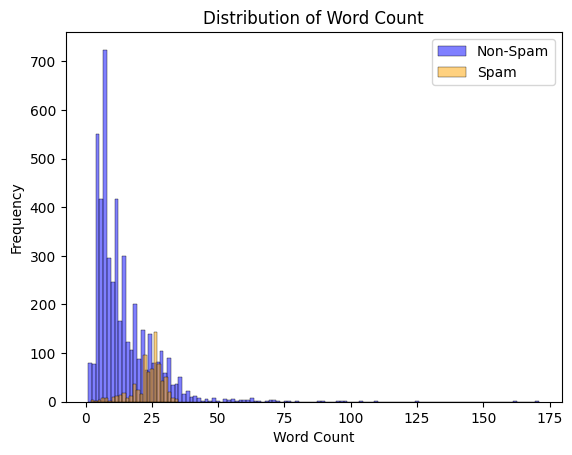

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split messages into spam and non-spam
spam_messages = data[data['target'] == 'spam']['text']
non_spam_messages = data[data['target'] == 'ham']['text']

# Calculate word count for spam and non-spam messages
spam_word_count = spam_messages.str.split().apply(len)
non_spam_word_count = non_spam_messages.str.split().apply(len)

# Plot distribution of word count
sns.histplot(non_spam_word_count, label='Non-Spam', color='blue', alpha=0.5)
sns.histplot(spam_word_count, label='Spam', color='orange', alpha=0.5)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count')
plt.legend()
plt.show()


Next, the word count of spam and non-spam messages is analyzed. The distribution of word count is visualized using histograms. We observe that non-spam messages have a wider range of word counts, while spam messages have a more concentrated range. This information suggests that word count could be a useful feature for distinguishing between spam and non-spam messages.

Most Frequent Words


To further understand the characteristics of spam and non-spam messages, the code analyzes the most frequently used words in each category. The top 30 words for both spam and non-spam messages are counted and plotted in bar graphs.

The bar graph for non-spam messages shows that common words such as "you," "I," and "the" are frequently used. In contrast, the bar graph for spam messages reveals words like "free," "call," and "now" as the most frequent. These findings indicate that certain words can serve as indicators of spam messages.

In [7]:
#for counting frequently occurence of spam and ham.

count1 = Counter(" ".join(data[data['target']=='ham']["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(data[data['target']=='spam']["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

Graph Of The Most Frequent Words In Non-Spam

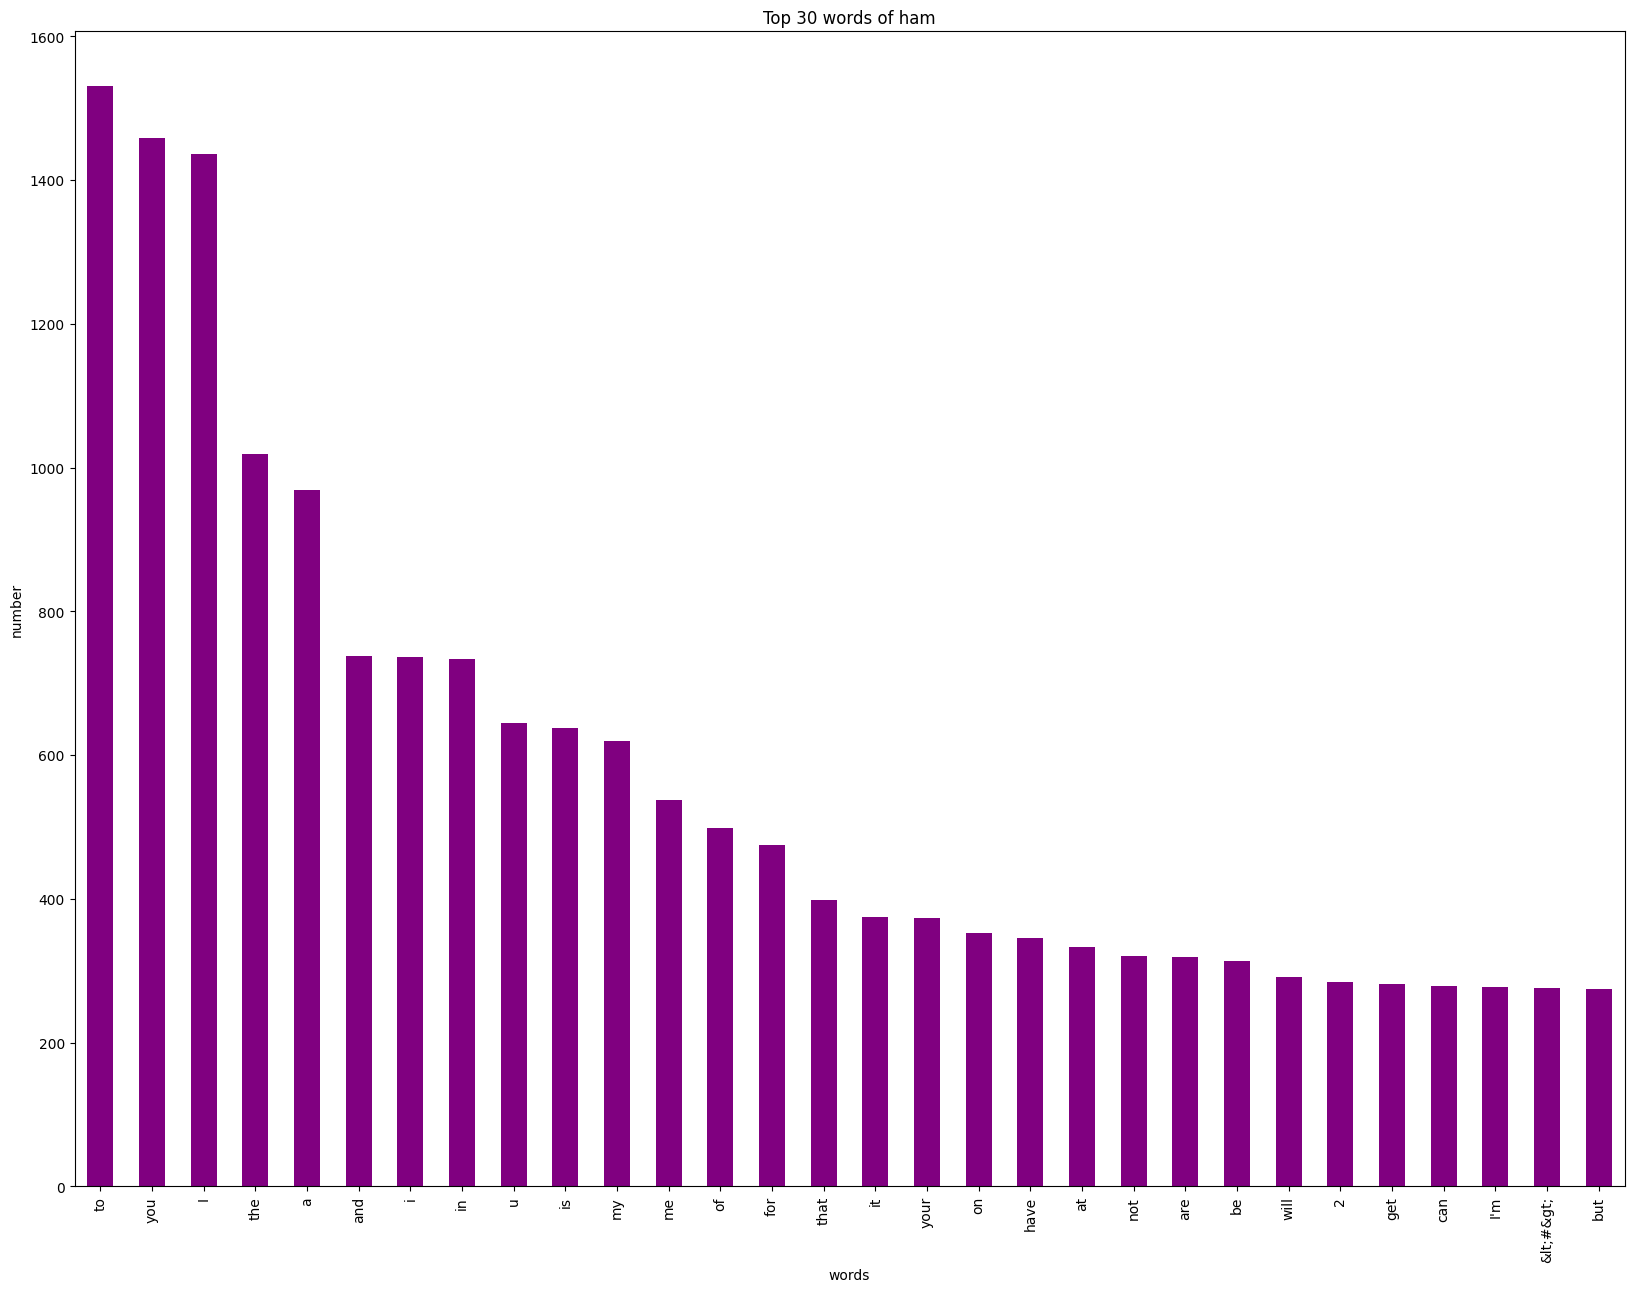

In [8]:
data1.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Graph Of The Most Frequent Words In Spam

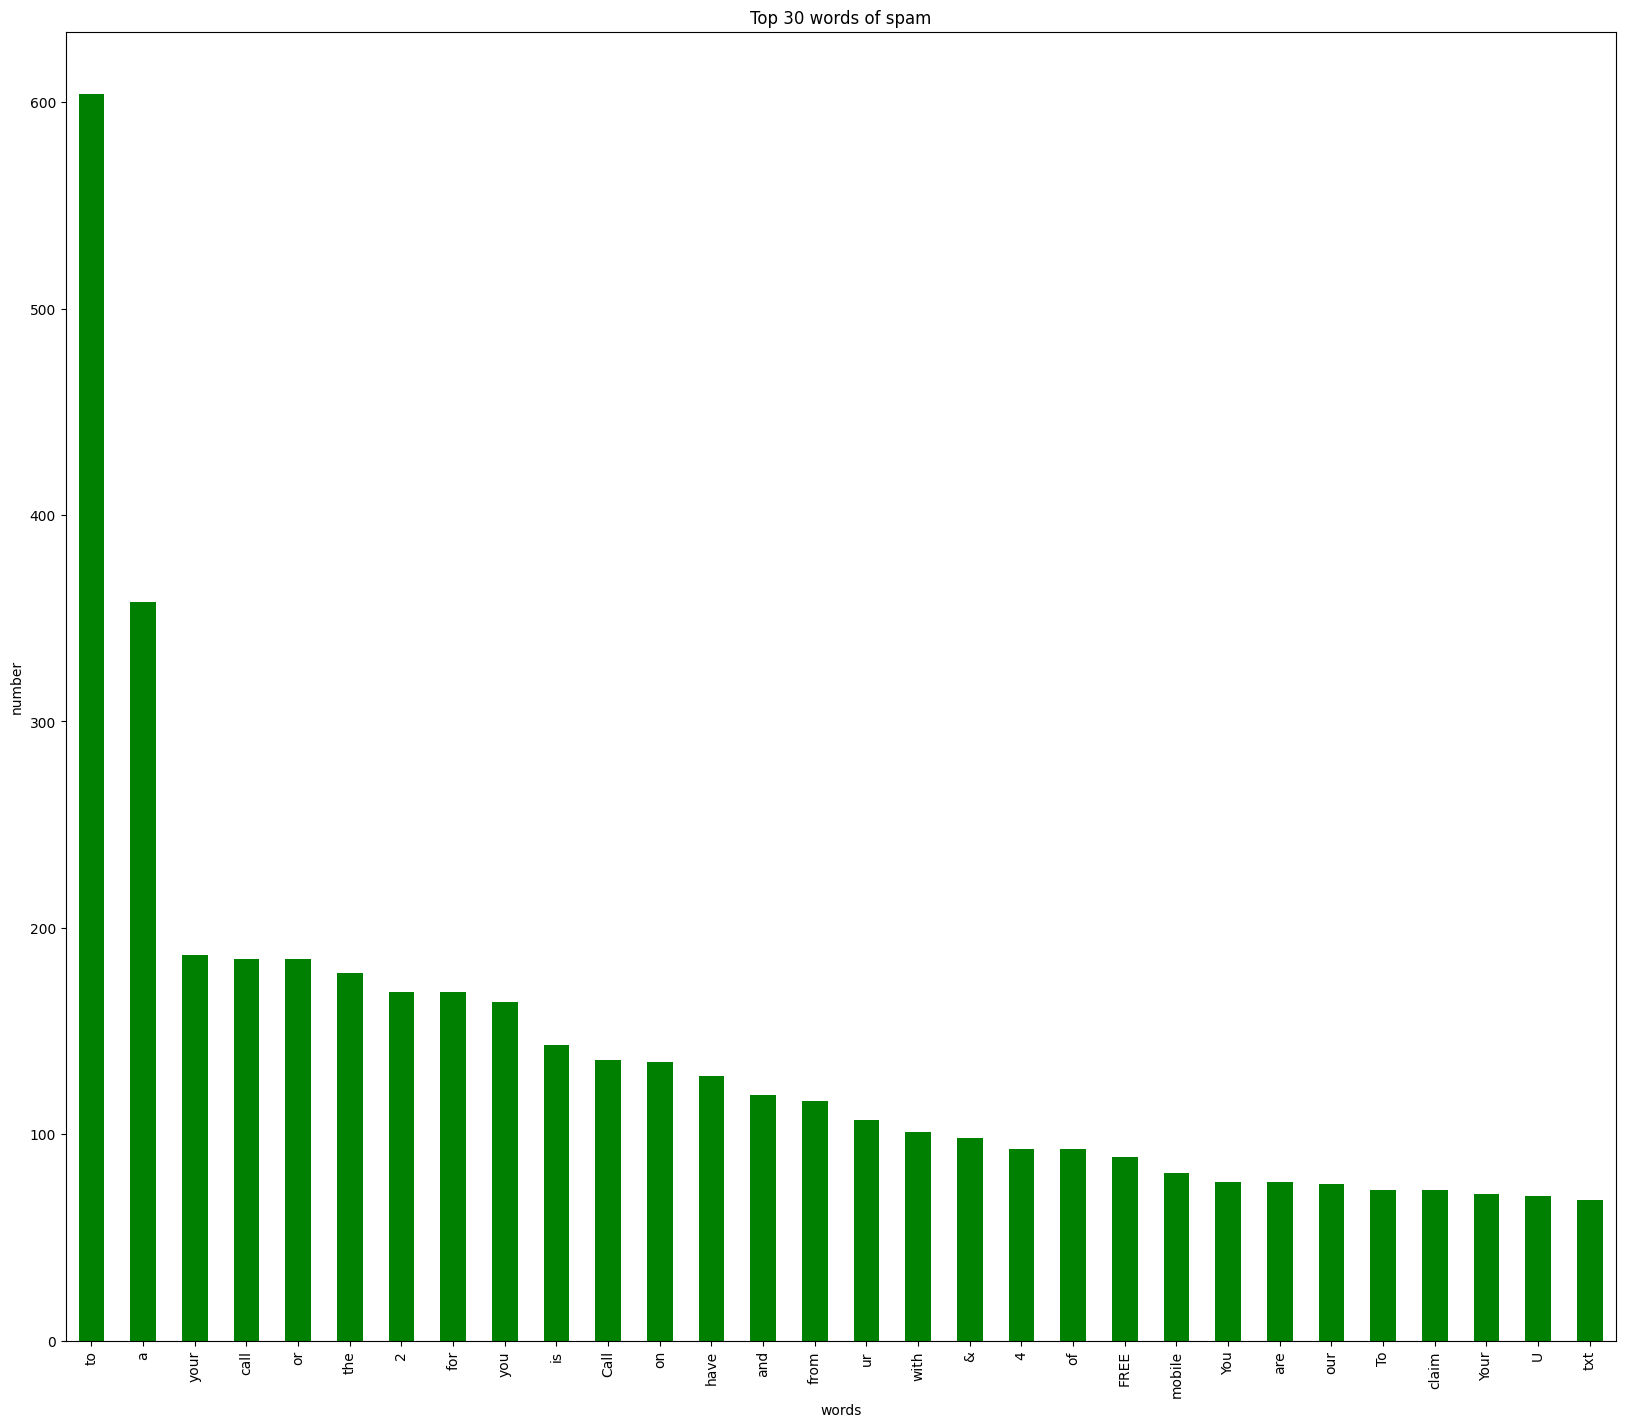

In [9]:
data2.plot.bar(legend = False, color = 'green', figsize = (20,17))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Data Cleaning!


Before applying machine learning algorithms, the data is cleaned to remove noise and improve classification accuracy. The code includes a series of cleaning functions such as removing hyperlinks, converting to lowercase, removing numbers, removing punctuation, removing whitespace, and replacing newlines. These functions help standardize the text data for further processing.

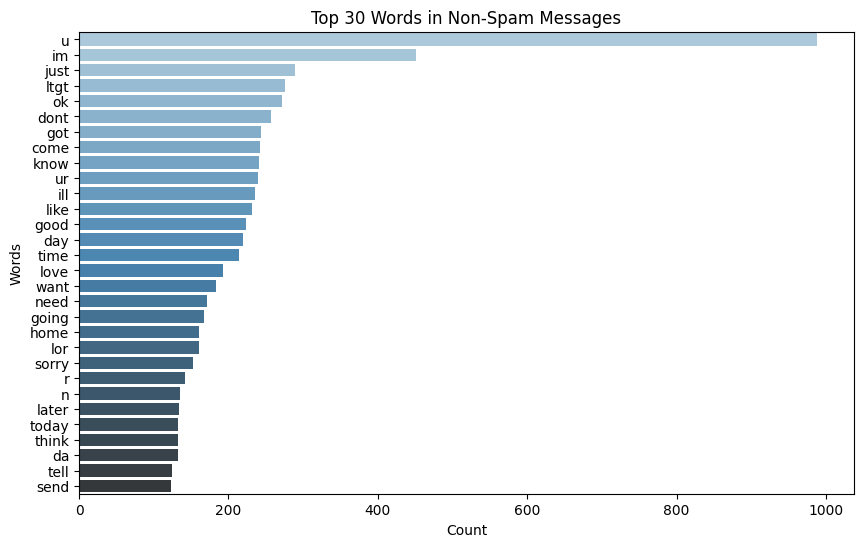

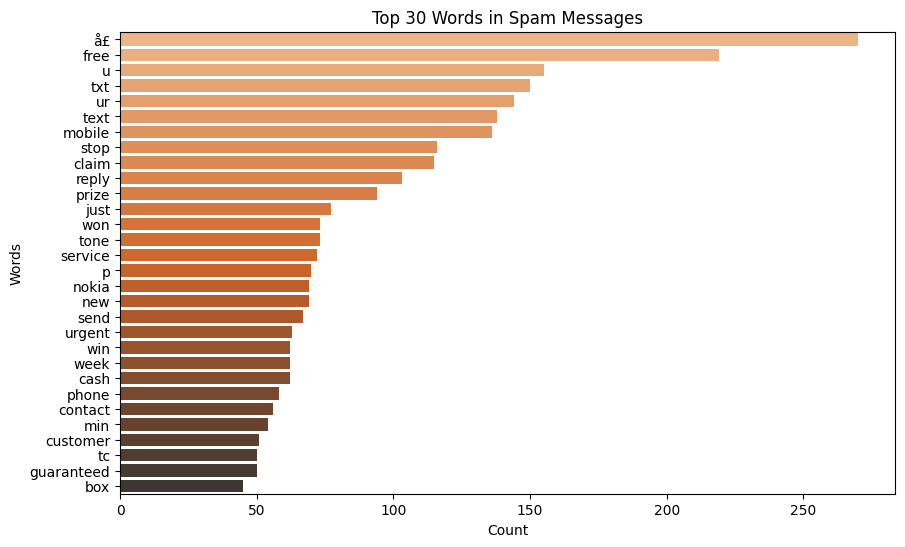

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import string

def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n', '')

def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,
                      remove_whitespace] 
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

def remove_stop_words(words):
    result = [i for i in words if i not in ENGLISH_STOP_WORDS]
    return result

def word_lemmatizer(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(o) for o in words]

def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words, word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words

# Clean up spam messages
spam_messages_cleaned = [clean_up_pipeline(message) for message in spam_messages]

# Clean up non-spam messages
non_spam_messages_cleaned = [clean_up_pipeline(message) for message in non_spam_messages]

# Tokenize, remove stop words, and lemmatize the cleaned messages
spam_tokens = [word_tokenize(message) for message in spam_messages_cleaned]
non_spam_tokens = [word_tokenize(message) for message in non_spam_messages_cleaned]

spam_tokens_cleaned = [clean_token_pipeline(tokens) for tokens in spam_tokens]
non_spam_tokens_cleaned = [clean_token_pipeline(tokens) for tokens in non_spam_tokens]

# Count the cleaned tokens for spam messages
spam_words = [word for tokens in spam_tokens_cleaned for word in tokens]
spam_word_counts = Counter(spam_words).most_common(30)

# Count the cleaned tokens for non-spam messages
non_spam_words = [word for tokens in non_spam_tokens_cleaned for word in tokens]
non_spam_word_counts = Counter(non_spam_words).most_common(30)

# Plot the most frequent words in non-spam messages
data1 = pd.DataFrame(non_spam_word_counts, columns=["Words", "Count"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Words", data=data1, palette="Blues_d")
plt.title("Top 30 Words in Non-Spam Messages")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()

# Plot the most frequent words in spam messages
data2 = pd.DataFrame(spam_word_counts, columns=["Words", "Count"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Words", data=data2, palette="Oranges_d")
plt.title("Top 30 Words in Spam Messages")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()


lets Visualise The Data

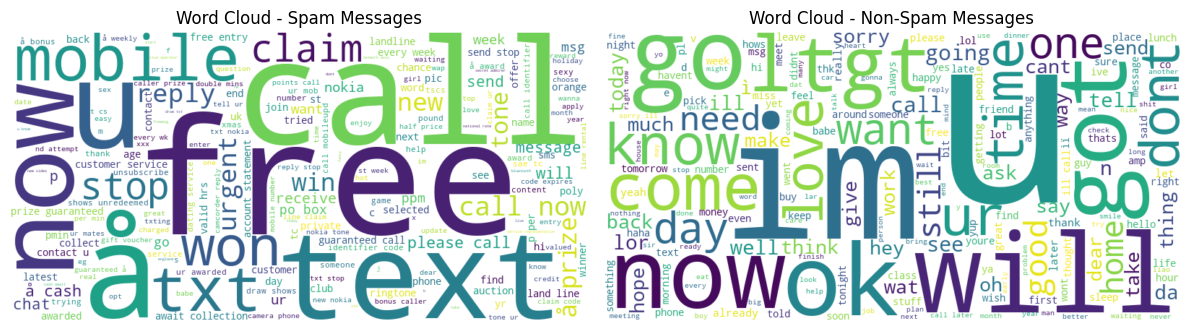

In [11]:
from wordcloud import WordCloud

spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages_cleaned))
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_spam_messages_cleaned))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Spam Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Non-Spam Messages')
plt.axis('off')

plt.tight_layout()
plt.show()


Improved Word Frequency Analysis after Data Cleaning



After cleaning the data, a new analysis is performed to identify the most frequent words in spam and non-spam messages. Stop words (common words like "the," "and," "is") are removed, and word lemmatization is applied to reduce words to their base form. The top 30 words for both spam and non-spam messages are plotted again, revealing a clearer distinction between the two categories.

The bar graph for non-spam messages now shows words like "get," "ok," and "go" among the most frequent. In contrast, the bar graph for spam messages includes words like "claim," "prize," and "urgent." These findings indicate that data cleaning helps uncover more relevant keywords and improves the accuracy of spam detection.

Lets Split The Data Into Test And Train Sets.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size = 0.3, random_state = 37)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  3900
X_test:  1672
y_train:  3900
y_test:  1672


Lets try descion tree again after cleaning

Accuracy: 0.9596412556053812
Precision: 0.9592122730863614
Recall: 0.9596412556053812
F1 Score: 0.9593914496202982
Confusion Matrix:
[[926  20]
 [ 25 144]]


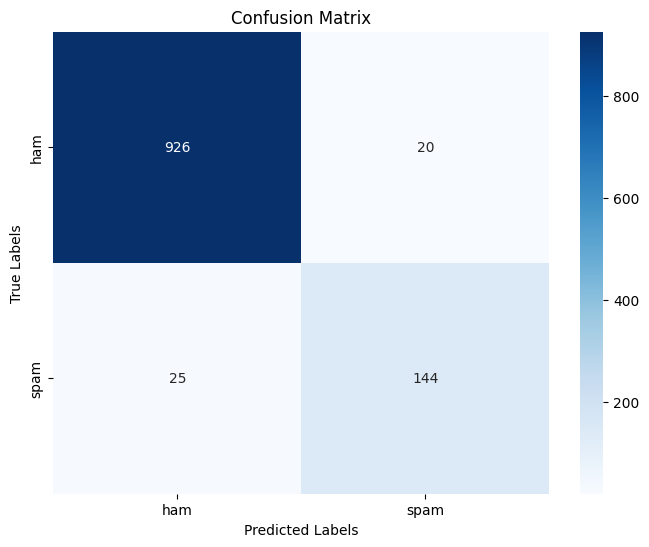


Instances where predictions don't match true labels:
Text: may b approve panalambut it should have more posts
True Label: ham
Predicted Label: spam

Text: your next amazing xxx picsfree video will be sent to you enjoy if one vid is not enough for day text back the keyword picsfree to get the next video
True Label: spam
Predicted Label: ham

Text: thanks for your subscription to ringtone uk your mobile will be charged å£month please confirm by replying yes or no if you reply no you will not be charged
True Label: spam
Predicted Label: ham

Text: dont pick up d call when something important is there to tell hrishi
True Label: ham
Predicted Label: spam

Text: shall call now dear having food
True Label: ham
Predicted Label: spam

Text: block breaker now comes in deluxe format with new features and great graphics from tmobile buy for just å£ by replying get bbdeluxe and take the challenge
True Label: spam
Predicted Label: ham

Text: lookatme thanks for your purchase of a video clip from lo

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Your data cleaning functions here (remove_hyperlink, to_lower, remove_number, etc.)

# Define your spam and non-spam messages lists (spam_messages and non_spam_messages)

# Clean up spam messages
spam_messages_cleaned = [clean_up_pipeline(message) for message in spam_messages]

# Clean up non-spam messages
non_spam_messages_cleaned = [clean_up_pipeline(message) for message in non_spam_messages]

# Prepare the data for training and testing
X = spam_messages_cleaned + non_spam_messages_cleaned
y = ['spam'] * len(spam_messages_cleaned) + ['ham'] * len(non_spam_messages_cleaned)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Create a graphical representation of the confusion matrix
class_names = list(decision_tree.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print instances where predictions don't match true labels
print("\nInstances where predictions don't match true labels:")
for idx in range(len(X_test)):
    if y_test[idx] != y_pred[idx]:
        print("Text:", X_test[idx])
        print("True Label:", y_test[idx])
        print("Predicted Label:", y_pred[idx])
        print()


c:\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.95695067264574
AdaBoost Precision: 0.9564100107015764
AdaBoost Recall: 0.95695067264574
AdaBoost F1 Score: 0.9566297169474299
AdaBoost Confusion Matrix:
[[925  21]
 [ 27 142]]


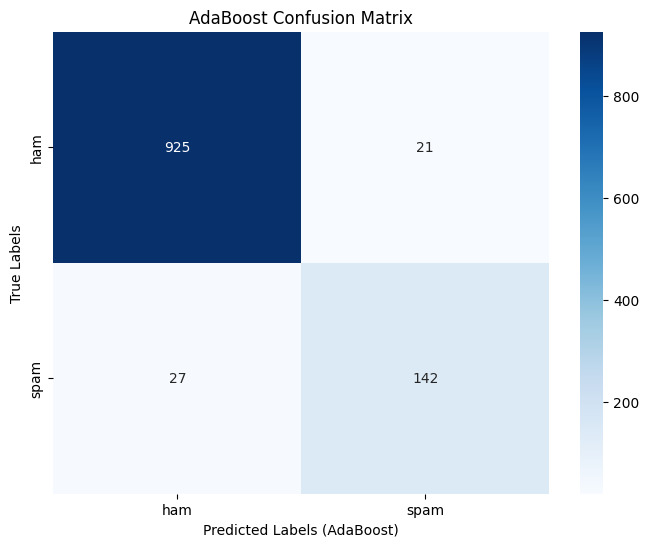


Instances where AdaBoost predictions don't match true labels:
Text: may b approve panalambut it should have more posts
True Label: ham
Predicted Label (AdaBoost): spam

Text: your next amazing xxx picsfree video will be sent to you enjoy if one vid is not enough for day text back the keyword picsfree to get the next video
True Label: spam
Predicted Label (AdaBoost): ham

Text: thanks for your subscription to ringtone uk your mobile will be charged å£month please confirm by replying yes or no if you reply no you will not be charged
True Label: spam
Predicted Label (AdaBoost): ham

Text: hi peteynoiåõm ok just wanted  chat coz avent spoken  u  a long timehope ur doin alritehave good nit at js love ya amx
True Label: ham
Predicted Label (AdaBoost): spam

Text: dont pick up d call when something important is there to tell hrishi
True Label: ham
Predicted Label (AdaBoost): spam

Text: shall call now dear having food
True Label: ham
Predicted Label (AdaBoost): spam

Text: block breaker now 

In [14]:
from sklearn.ensemble import AdaBoostClassifier
# Train the AdaBoost classifier with the base model as Decision Tree
adaboost = AdaBoostClassifier(base_estimator=decision_tree)
adaboost.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost.predict(X_test_vectorized)

# Evaluate the AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

print("AdaBoost Accuracy:", accuracy_adaboost)
print("AdaBoost Precision:", precision_adaboost)
print("AdaBoost Recall:", recall_adaboost)
print("AdaBoost F1 Score:", f1_adaboost)
print("AdaBoost Confusion Matrix:")
print(conf_matrix_adaboost)

# Create a graphical representation of the AdaBoost confusion matrix
class_names_adaboost = list(adaboost.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Blues", xticklabels=class_names_adaboost, yticklabels=class_names_adaboost)
plt.xlabel('Predicted Labels (AdaBoost)')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix')
plt.show()

# Print instances where AdaBoost predictions don't match true labels
print("\nInstances where AdaBoost predictions don't match true labels:")
for idx in range(len(X_test)):
    if y_test[idx] != y_pred_adaboost[idx]:
        print("Text:", X_test[idx])
        print("True Label:", y_test[idx])
        print("Predicted Label (AdaBoost):", y_pred_adaboost[idx])
        print()


Lets Try The Naive Baise

In [15]:
cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

X_train_cv = cv.transform(X_train)
X_train_cv

X_test_cv = cv.transform(X_test)
X_test_cv

mnb = MultinomialNB(alpha = 0.5)
mnb.fit(X_train_cv,y_train)

y_mnb = mnb.predict(X_test_cv)
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))
print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))

Naive Bayes Accuracy:  0.9847533632286996
Naive Bayes confusion_matrix:  [[939  10]
 [  7 159]]


lets try the adaboost

In [16]:
abc = AdaBoostClassifier(n_estimators=37, random_state=252)
abc.fit(X_train_cv,y_train)
y_abc = abc.predict(X_test_cv)
print('AdaBoost Accuracy_score: ',accuracy_score(y_test,y_abc))
print('AdaBoost confusion_matrix: ', confusion_matrix(y_abc, y_test)) 

AdaBoost Accuracy_score:  0.9623318385650225
AdaBoost confusion_matrix:  [[934  30]
 [ 12 139]]


Model Training and Evaluation



The code splits the dataset into training and testing sets using a 70:30 ratio. Two classifiers, Naive Bayes and AdaBoost, are trained and evaluated on the dataset.

For the Naive Bayes classifier, the text data is transformed into numerical features using CountVectorizer. The classifier is trained on the training data and then used to predict the labels of the test data. The accuracy score and confusion matrix of the Naive Bayes classifier are calculated and displayed.

Similarly, the AdaBoost classifier is trained with different numbers of estimators (10, 50, 100, 150, and 200). The accuracy scores for each number of estimators are plotted to visualize the performance. The best estimator is selected based on the highest accuracy score, and the AdaBoost classifier with the best estimator is evaluated by calculating the accuracy score and confusion matrix.

X_train: 3900
X_test: 1672
y_train: 3900
y_test: 1672


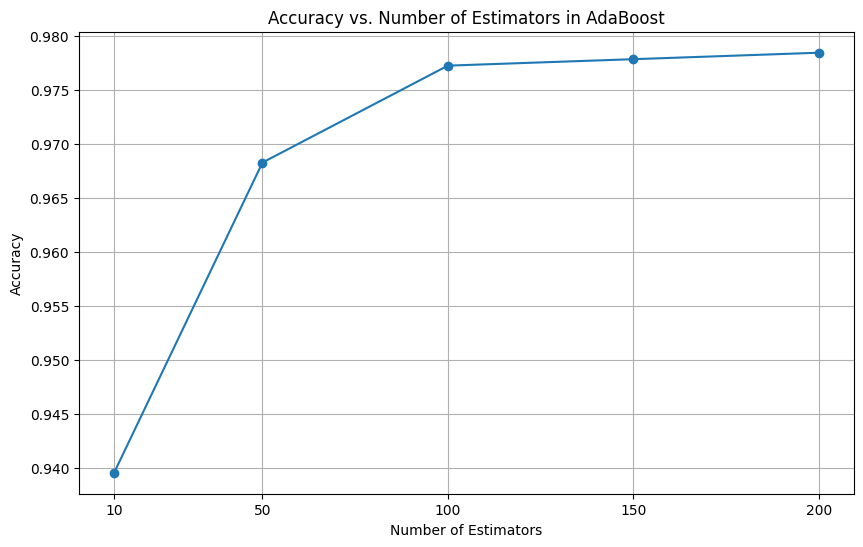

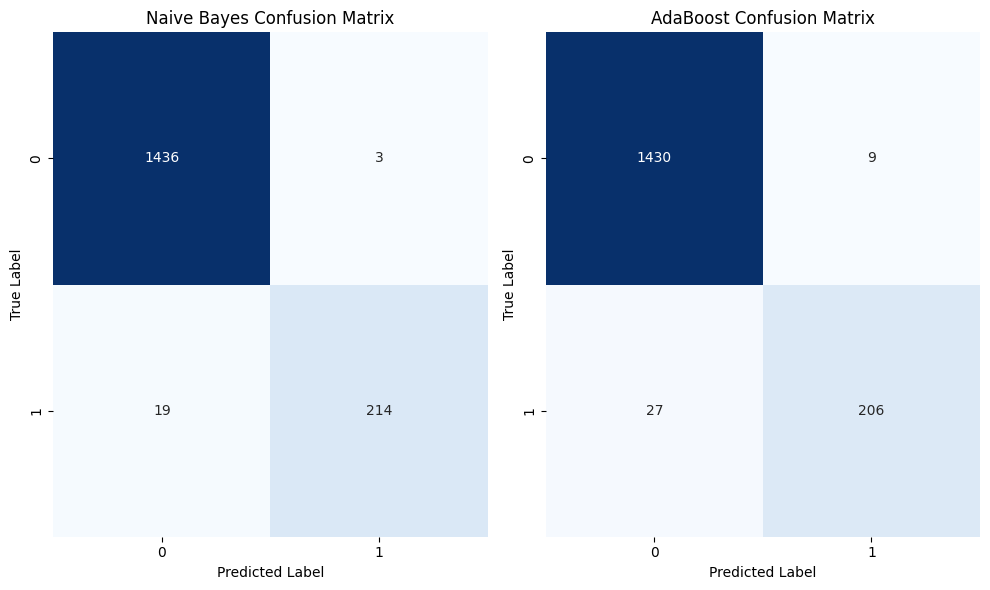

Naive Bayes Accuracy: 0.9868421052631579
AdaBoost Accuracy (Best Estimator): 0.9784688995215312


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.3, random_state=37)
print("X_train:", len(X_train))
print("X_test:", len(X_test))
print("y_train:", len(y_train))
print("y_test:", len(y_test))

# Convert text data into numerical representation
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_vectorized, y_train)
mnb_predictions = mnb.predict(X_test_vectorized)

# Train an AdaBoost classifier with varying number of estimators
estimators = [10, 50, 100, 150, 200]
accuracy_scores = []

for estimator in estimators:
    adaBoost = AdaBoostClassifier(n_estimators=estimator)
    adaBoost.fit(X_train_vectorized, y_train)
    adaBoost_predictions = adaBoost.predict(X_test_vectorized)
    accuracy = metrics.accuracy_score(y_test, adaBoost_predictions)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different number of estimators
plt.figure(figsize=(10, 6))
plt.plot(estimators, accuracy_scores, marker='o')
plt.title("Accuracy vs. Number of Estimators in AdaBoost")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.xticks(estimators)
plt.grid(True)
plt.show()

# Compare the accuracy and confusion matrices of Naive Bayes and AdaBoost
mnb_accuracy = metrics.accuracy_score(y_test, mnb_predictions)
adaBoost_best_estimator = estimators[np.argmax(accuracy_scores)]
adaBoost_best = AdaBoostClassifier(n_estimators=adaBoost_best_estimator)
adaBoost_best.fit(X_train_vectorized, y_train)
adaBoost_best_predictions = adaBoost_best.predict(X_test_vectorized)
adaBoost_best_accuracy = metrics.accuracy_score(y_test, adaBoost_best_predictions)

mnb_confusion_matrix = metrics.confusion_matrix(y_test, mnb_predictions)
adaBoost_best_confusion_matrix = metrics.confusion_matrix(y_test, adaBoost_best_predictions)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.heatmap(mnb_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(adaBoost_best_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

print("Naive Bayes Accuracy:", mnb_accuracy)
print("AdaBoost Accuracy (Best Estimator):", adaBoost_best_accuracy)


Conclusion


Through the analysis of the code and visualizations, we have gained a deeper understanding of the subject. We observed the distribution of spam and non-spam messages, analyzed the word count distributions, identified the most frequent words in each category, performed data at the end of the execution.

#TODO 
1) clean the comments
2) change the code so we dont get ha3taka
3)make more conclusions and write the summery word
4)learn the project content for hatsaga
5)think of more ways to make it more complex(f1 score,tsne,histogram,run the algorithims on the unclean data first then find that there is a problem in the accuracy, show the problamatic fp and fn and drop them with clean, heat map,run tests on another csv of ham spam data and see how the algorithm handles it does it overfit?,Laplace smoothing,SVM)
6) make the grapghs of most frequent words the same style before and after cleaning 

In [18]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
# Train the SVM classifier
svm = SVC(kernel='poly')  # You can experiment with different kernels like 'linear', 'rbf', 'poly', etc.
svm.fit(X_train_vectorized, y_train)

# Make predictions on the test data
svm_predictions = svm.predict(X_test_vectorized)

# Evaluate the SVM classifier
from sklearn.metrics import accuracy_score, confusion_matrix

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)
print("SVM Confusion Matrix:")
print(svm_confusion_matrix)


SVM Accuracy: 0.9455741626794258
SVM Confusion Matrix:
[[1434    5]
 [  86  147]]


In [19]:
# Add the KNN implementation
from sklearn.neighbors import KNeighborsClassifier

# Convert text data into numerical representation
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (k) as needed
knn.fit(X_train_vectorized, y_train)
knn_predictions = knn.predict(X_test_vectorized)
knn_accuracy = metrics.accuracy_score(y_test, knn_predictions)
knn_confusion_matrix = metrics.confusion_matrix(y_test, knn_predictions)

# Compare the accuracy and confusion matrix of KNN
print("KNN Accuracy:", knn_accuracy)
print("KNN Confusion Matrix:")
print(knn_confusion_matrix)


KNN Accuracy: 0.9078947368421053
KNN Confusion Matrix:
[[1439    0]
 [ 154   79]]


In [20]:
from sklearn.preprocessing import LabelEncoder

# Convert target values to numerical labels
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

# Initialize and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_vectorized, y_train_numeric)

# Evaluate the linear regression model
y_linear_reg = linear_reg.predict(X_test_vectorized)
y_linear_reg = (y_linear_reg >= 0.5).astype(int)  # Convert predicted probabilities to binary labels (0 or 1)

linear_reg_accuracy = accuracy_score(y_test_numeric, y_linear_reg)
print('Linear Regression Accuracy:', linear_reg_accuracy)

# Implement and evaluate AdaBoost on linear regression
adaBoost_linear = AdaBoostClassifier(base_estimator=linear_reg, n_estimators=50, random_state=42)
adaBoost_linear.fit(X_train_vectorized, y_train_numeric)
y_adaBoost_linear = adaBoost_linear.predict(X_test_vectorized)

adaBoost_linear_accuracy = accuracy_score(y_test_numeric, y_adaBoost_linear)
print('AdaBoost with Linear Regression Accuracy:', adaBoost_linear_accuracy)


NameError: name 'LinearRegression' is not defined